# Param search results

In [7]:
%reset -f
%matplotlib inline
from db import make_session, d_models

GROUP = '0'

session = make_session()
rslts = session.query(d_models.SmlnRslt).filter_by(group=GROUP).order_by(
    d_models.SmlnRslt.id.desc()).limit(10)
session.close()

for rslt in rslts:
    print('ID: {}, SUCCESS: {},\nMETRICS: {}\n'.format(rslt.id, rslt.success, rslt.metrics))
    print(rslt.params)

ID: 322, SUCCESS: False,
METRICS: {'success': False, 'frac_spk_non_trj': 0.04326923076923077, 'avg_spk_ct_trj': 1.0, 'frac_spk_trj': 0.1595744680851064}

{'W_E_INH_PC': 0.0112326752272045, 'T_R_INH': 0.002, 'E_L_PC': -0.068, 'T_M_PC': 0.05, 'W_I_PC_INH': 0, 'E_E': 0, 'T_E': 0.002, 'W_E_PC_PL': 0.02, 'S_TH': 0.1, 'Z_C_PC_INH': 2.6204920267770073, 'L_PL': 0.2, 'T_AHP_PC': 0.05, 'E_I': -0.08, 'T_C': 1.5, 'S_E_INH_PC': 0, 'L_INH_PC': 0.07545192518674274, 'L_PC_PC': 0.10192651022104082, 'R_TR': 0.4, 'E_L_INH': -0.058, 'T_M_INH': 0.009, 'B_S': 0.01, 'T_I': 0.005, 'L_S_PC_INH': 0.10401413314117981, 'S_E_INIT_PC_ST': 0, 'D_T_TR': 0.006021927389260778, 'W_E_PC_PC': 0.017809596708056152, 'Z_PC_PC': 1.25725768347929, 'C_S': 10, 'W_E_INIT_PC_ST': 0.0057016741712441164, 'S_E_PC_PC': 0, 'FR_TRJ_PC_ST': 3, 'E_AHP_PC': -0.07, 'FR_RPL_PC_ST': 115.39676580209031, 'T_W': 1, 'R_MAX': 600, 'T_R_PC': 0.02, 'V_R_INH': -0.058, 'V_TH_PC': -0.036, 'Z_S_PC_INH': 3.2377553283267133, 'A_TR': 0.008610508496036682, 

# Simulation verification

In [1]:
%reset -f
%matplotlib inline
from db import make_session, d_models
from seq_replay import plot, smln

SMLN_RSLT_ID = 335  #233

session = make_session()
smln_rslt = session.query(d_models.SmlnRslt).get(SMLN_RSLT_ID)
session.close()

p = smln_rslt.params
s_params = smln_rslt.s_params
apxn = smln_rslt.apxn

print('Running smln...')
rslt = smln.run(p, s_params, apxn)
print('Smln complete.')

Running smln...
Smln complete.


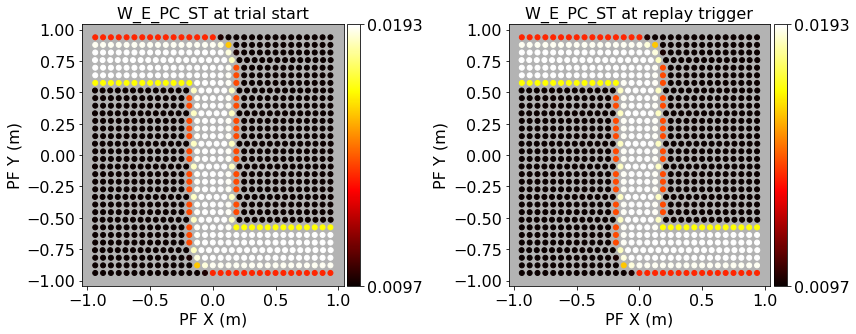

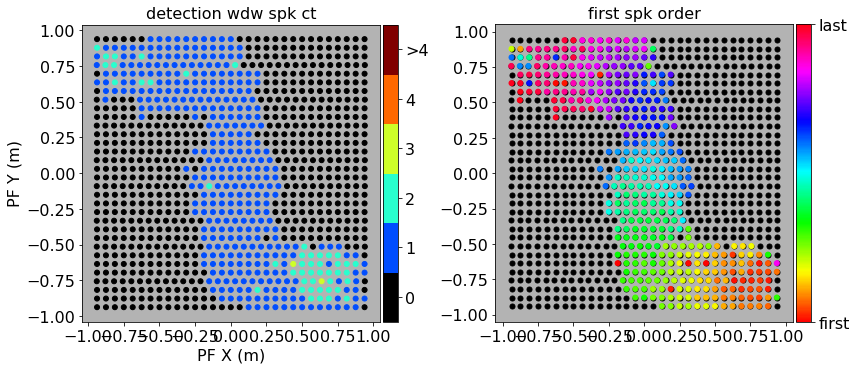

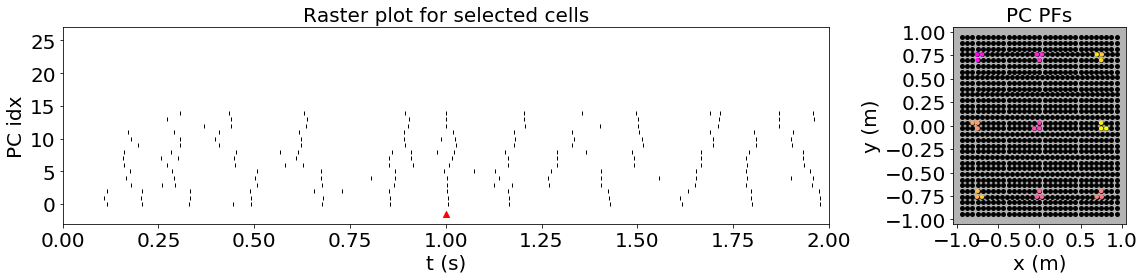

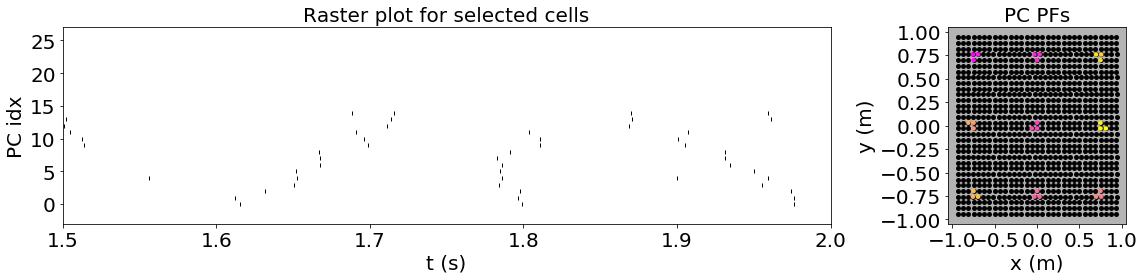

In [6]:
# make plots
plot.heat_maps(rslt, (1.82, 2));

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch='replay');

plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch=(1.5, 2));